# Property Price Prediction Project 

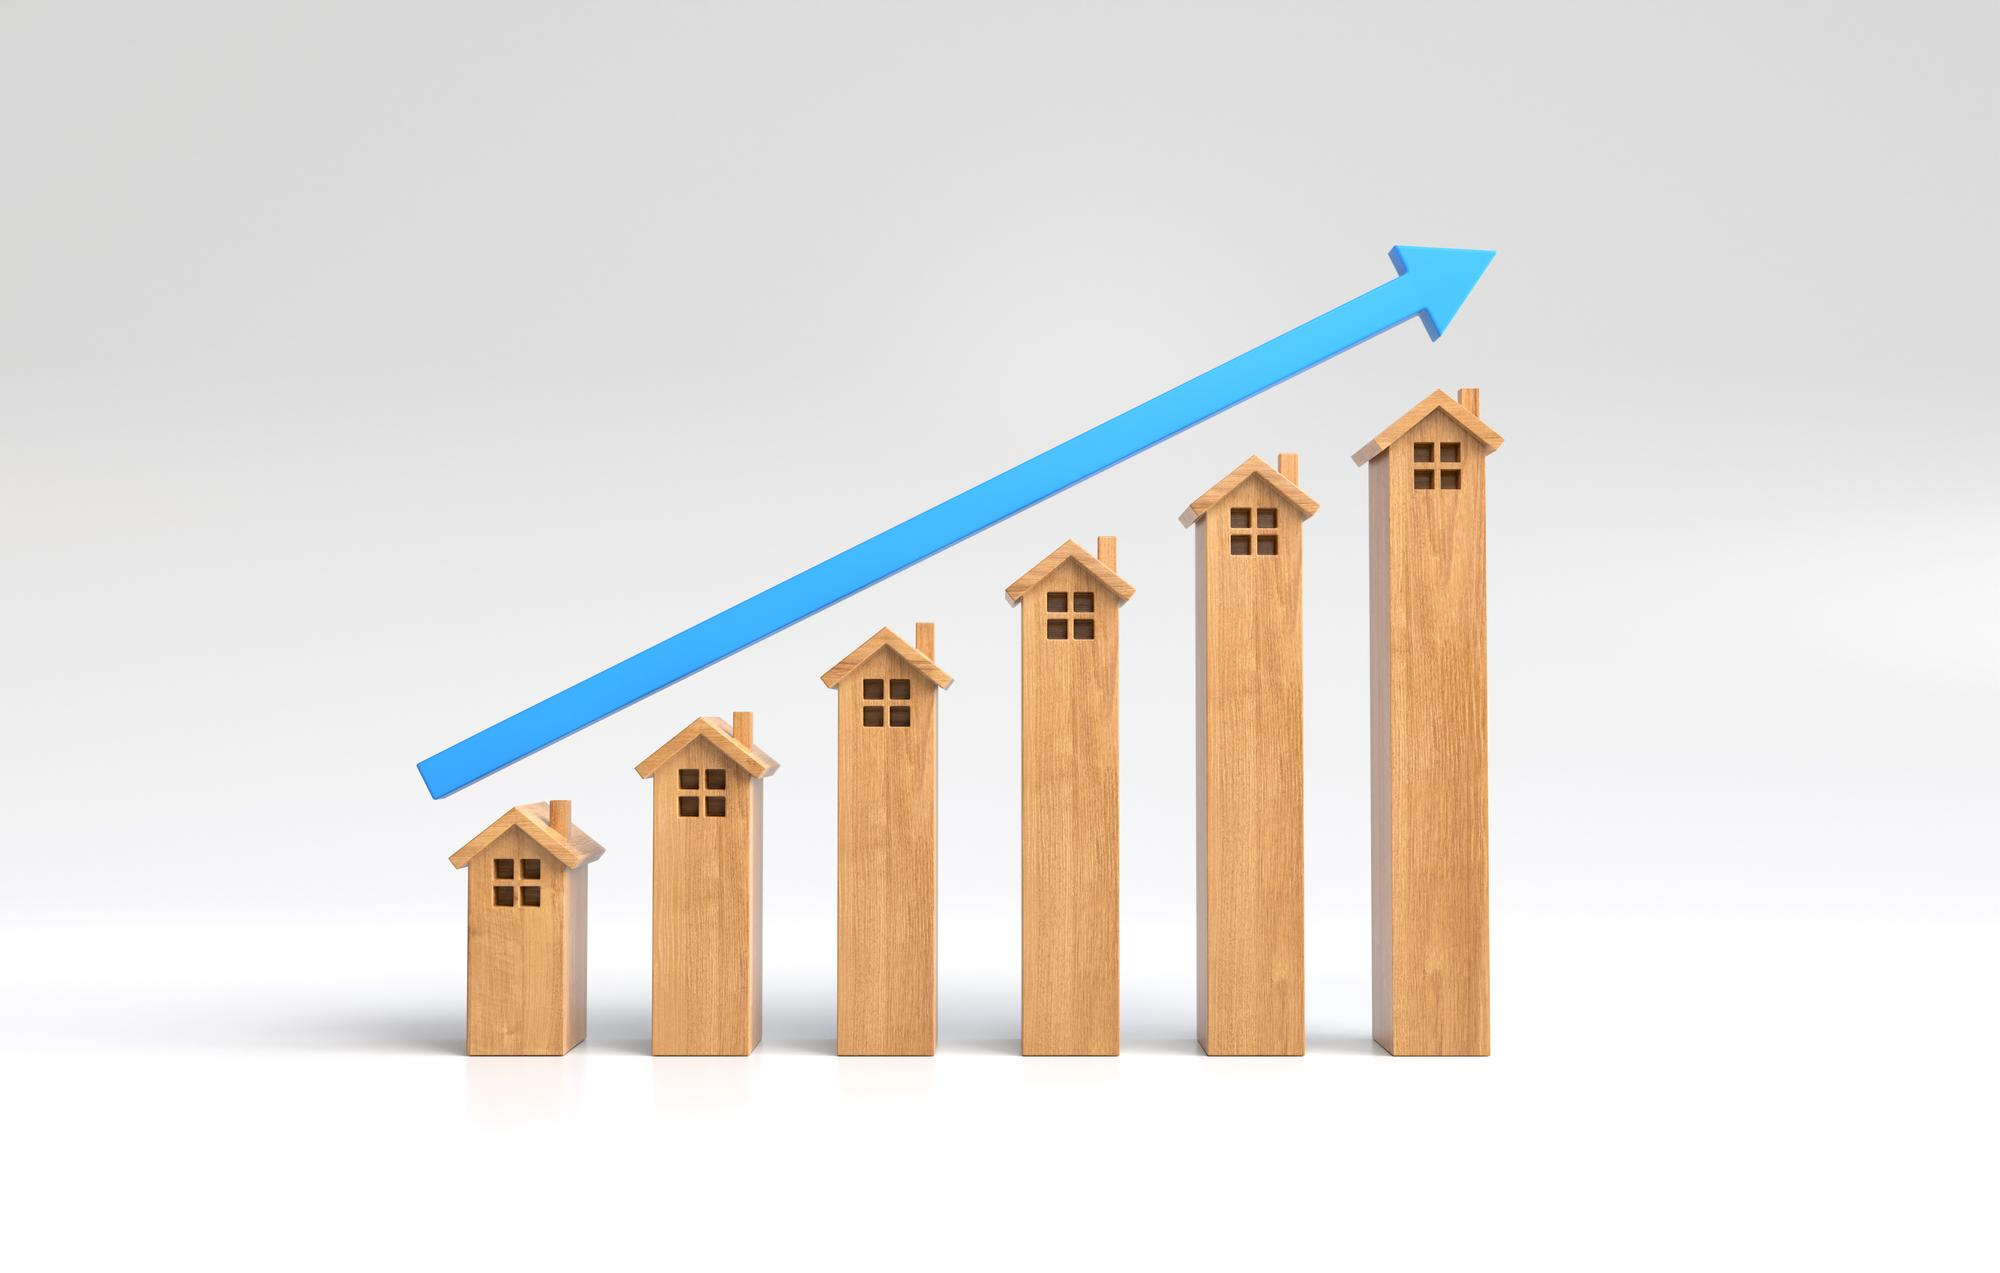

# Problem Objective  

# 1. Import Modules/libraries

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
from sklearn.datasets import fetch_california_housing
import warnings 
warnings.filterwarnings('ignore')
print('done')

done


# 2.Load Data Create DF 

In [2]:
#internet required to run this code
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [4]:
print(data_dict['target_names'])

['MedHouseVal']


In [5]:
df = pd.DataFrame(data_dict['data'],columns = data_dict['feature_names'])
df['MedHouseVal'] = data_dict['target']

print('Data Loaded Successfully')

Data Loaded Successfully


# 3. Understanding Data Using EDA 

In [6]:
#shape
df.shape

(20640, 9)

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
# check null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [9]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [10]:
#hundreds of thousands of dollars ($100,000) 1 lakh dollars
#average numbers of household members
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20570,3.2222,6.0,4.821429,1.032468,894.0,2.902597,38.54,-121.96,1.396


In [11]:
# All data Must be in Numerical, Dataset contains all values in numerical 
# We can proceed this for Analysis

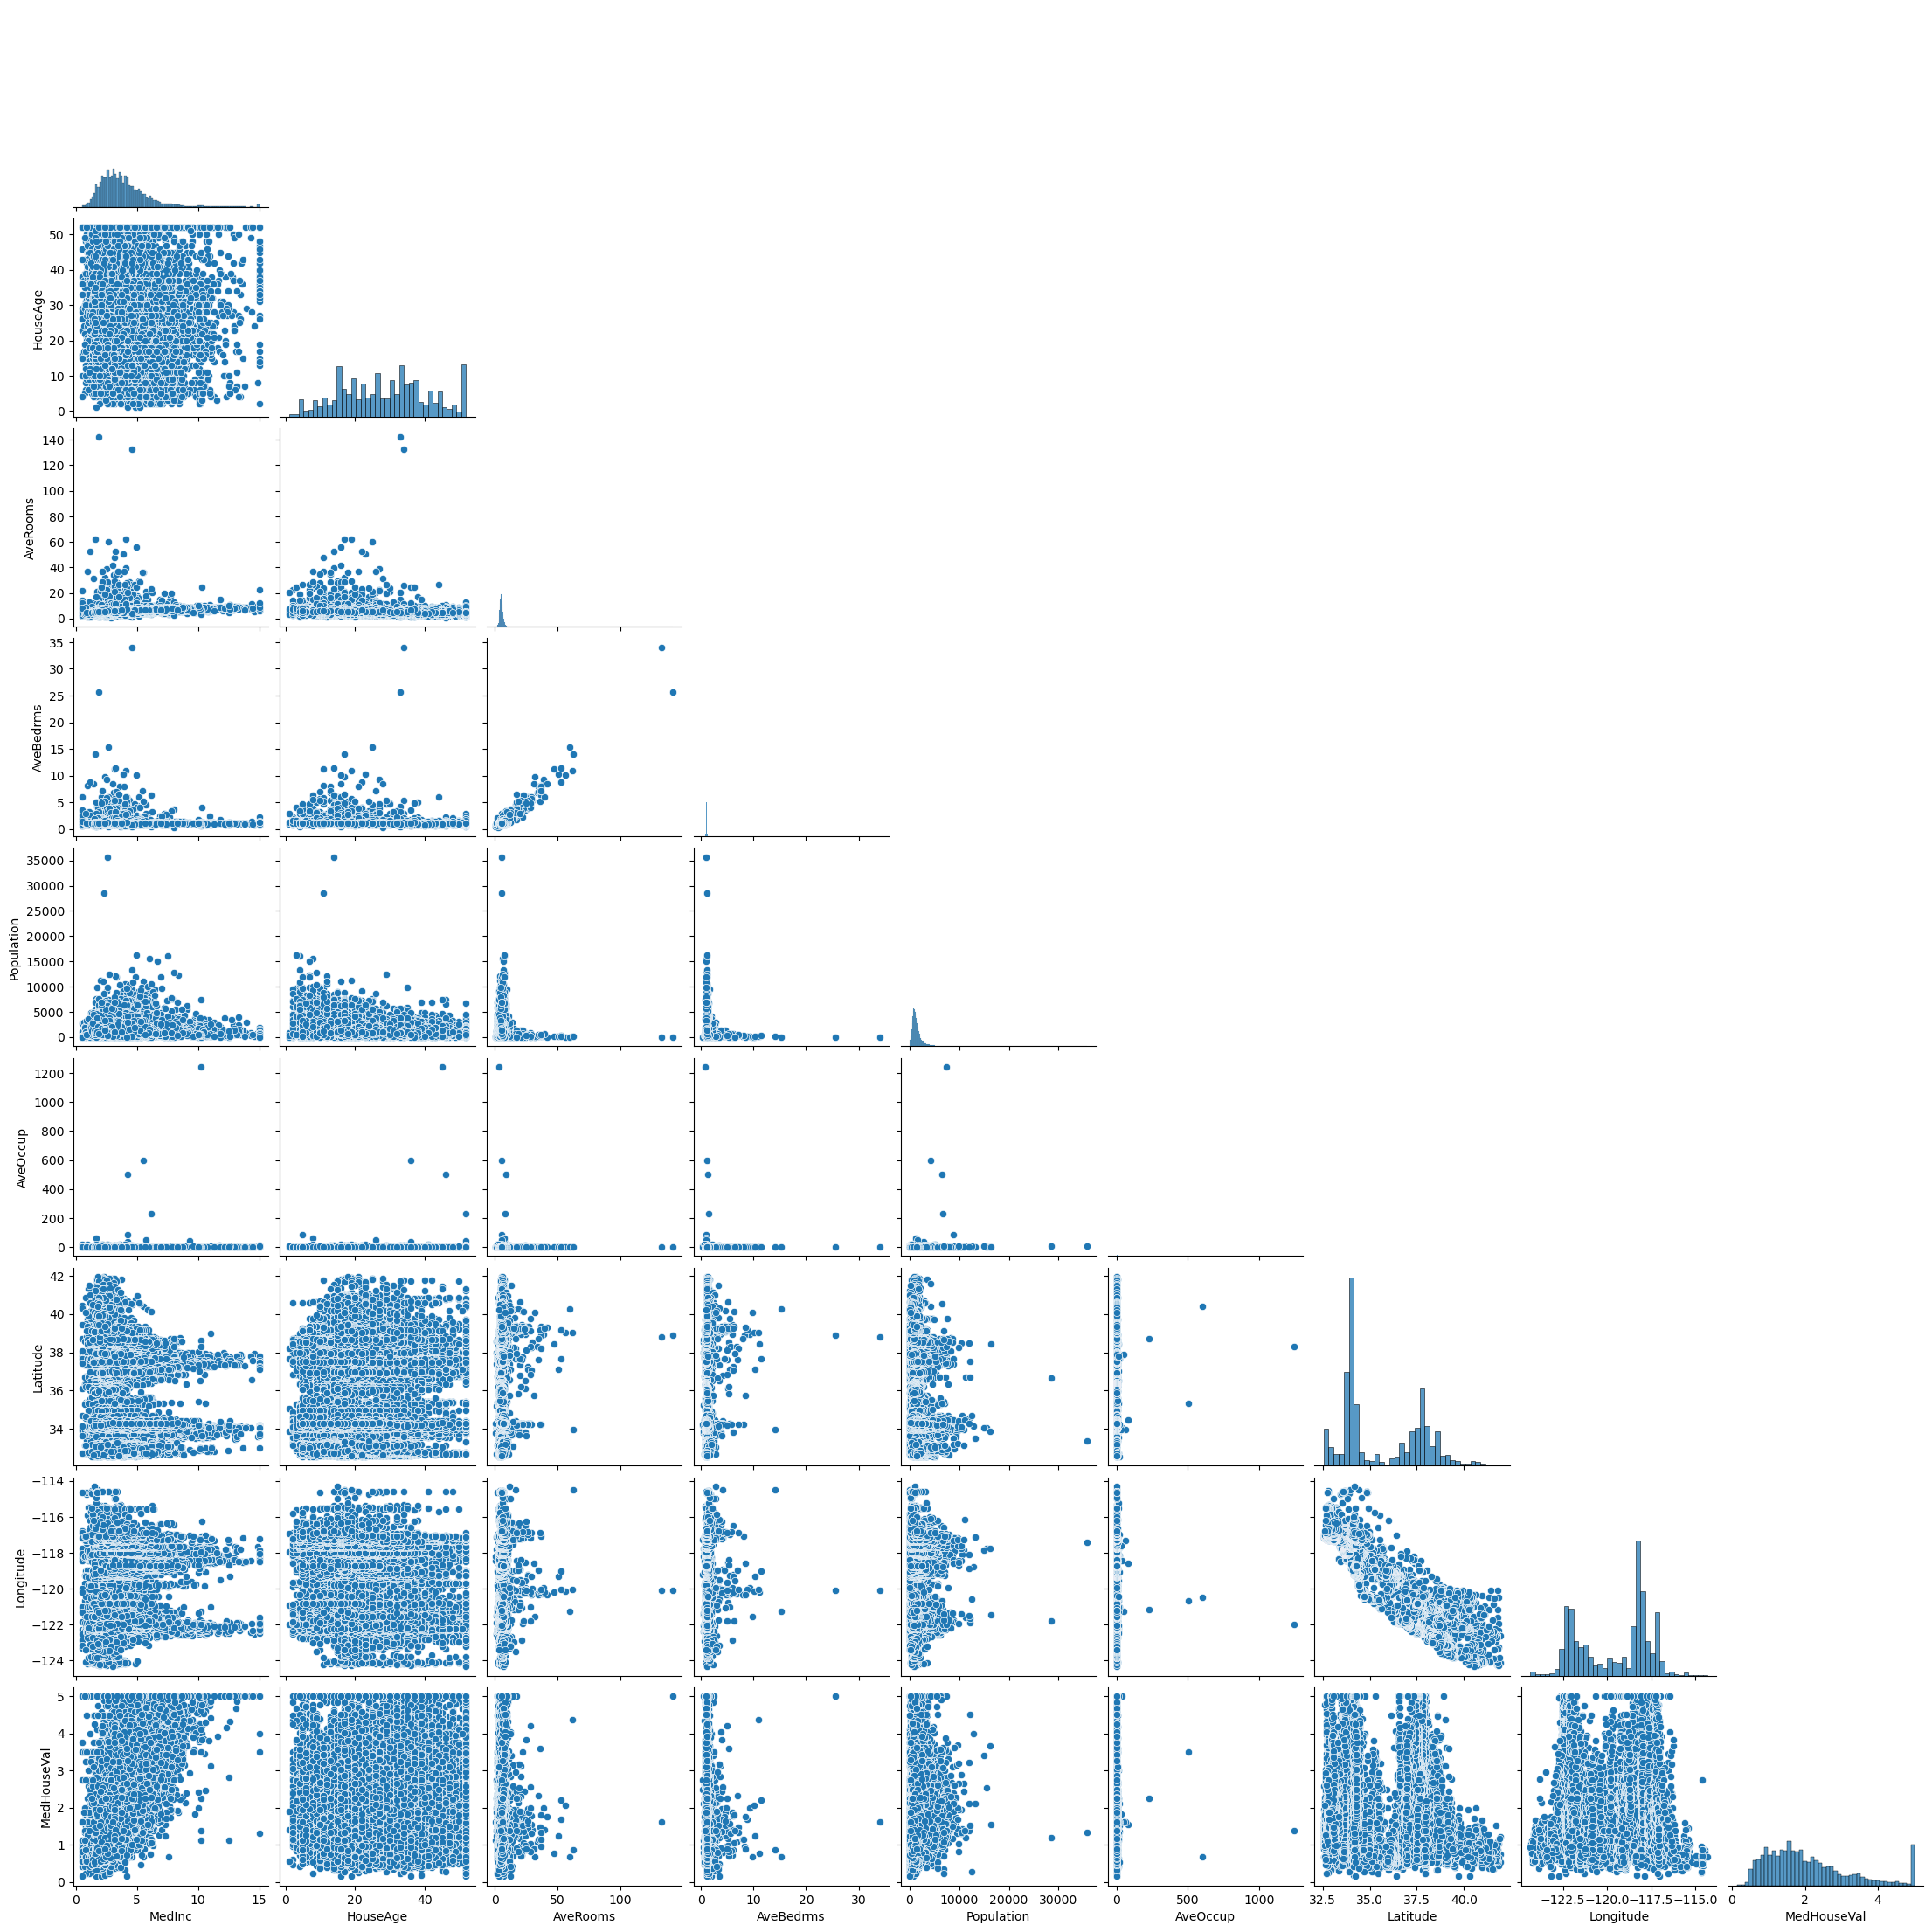

In [12]:
# Checking Data Distribution
sns.pairplot(data = df,corner = True)
plt.show()

<Axes: title={'center': 'Feature vs target corr'}>

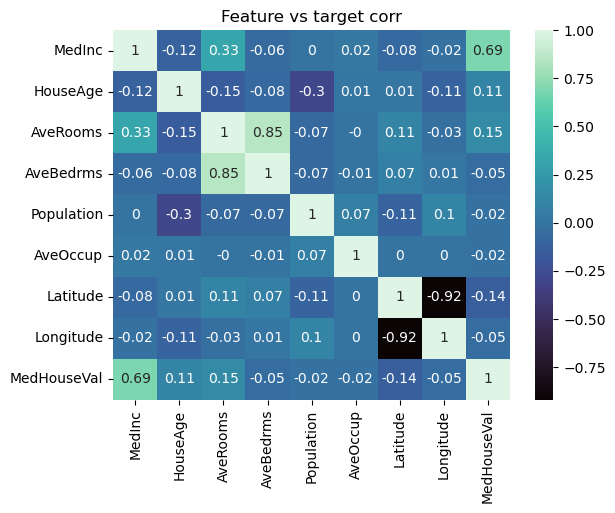

In [13]:
#checking data distribution 
plt.title('Feature vs target corr')
sns.heatmap(df.corr().round(2), annot = True, cmap = 'mako') # annot : show values

In [14]:
# data describe() : will give statistical Analysis
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


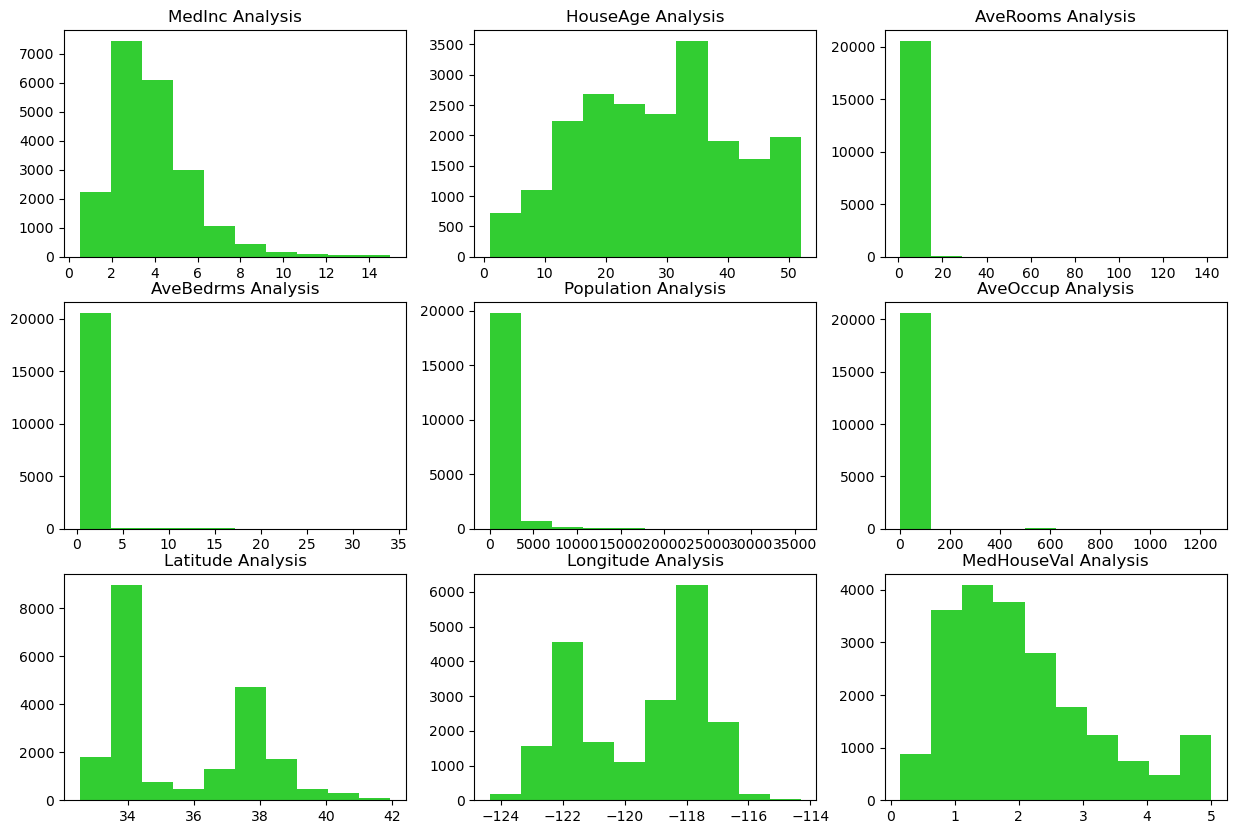

In [15]:
plt.figure(figsize = (15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j],color = 'limegreen') # alpha to change the contrast 
    plt.title(j +' Analysis')

plt.show()

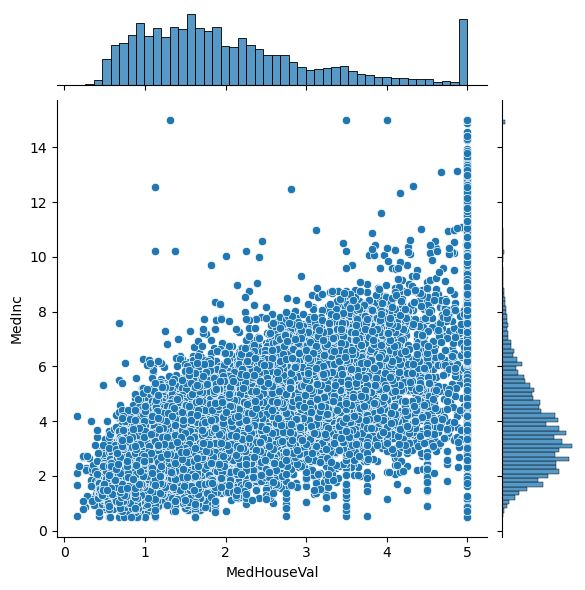

In [16]:
# Distribution of Target Value MedHouseValue VS MedInc
sns.jointplot(data = df, x = 'MedHouseVal' , y='MedInc')

In [17]:
# sns.regplot(data = df, x = 'MedHouseVal' , y='MedInc')

<Axes: title={'center': ' MedHouseValue VS MedInc'}, xlabel='MedHouseVal', ylabel='Count'>

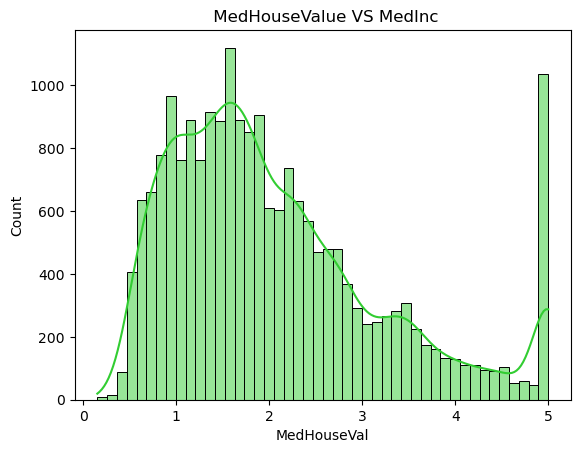

In [18]:
plt.title(' MedHouseValue VS MedInc')
sns.histplot(data = df, x = 'MedHouseVal' ,color = 'limegreen', kde = True)

In [19]:
# 75% of price less than 2.64 lakh dollars
df['MedHouseVal'].describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

# 4.Feature Engineering and Preprocessing 

In [20]:
# Convert data to same scale for better prediction 
# standardised and normalisation 
# normalisation through MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler

X = df.iloc[:,:-1]
y = df['MedHouseVal']

scaler = MinMaxScaler()

scaler.fit(X) #learning fit data in 0 to 1 (Normalisation)
X_scaled = scaler.transform(X)
print('done')

done


In [22]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


# 5. Train Test Split: Split Data For Training and Testing Part 

In [23]:
# Data Spliting
# shuffling of data so that all type of data is being trained 

In [24]:
# train test split: divide into train part and test part
# train_test_split func : divide 

In [25]:
# a,b,c,d = [23,534,6,65] # unpacking 
# a=23, b=534 and so on 

In [26]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size =.20, random_state = 150) # pre-defined sequence
print('done')

done


In [27]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (16512, 8)
Shape of X_test (4128, 8)
Shape of y_train (16512,)
Shape of y_test (4128,)


In [28]:
df.shape

(20640, 9)

# 6. Model Building 

### 6.1 Linear Model Using Linear Regression 

In [29]:
# creating Linear Model 
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() #object creation 

lr_model.fit(X_train,y_train) #traning model

LinearRegression()

#### 6.1.2 Model Prediction 

In [30]:
# Test Data : X_test

y_pred = lr_model.predict(X_test)
print('done')

done


In [31]:
# 20 % : actual answer : y_test, predicted: y_pred

lr_compare_df = pd.DataFrame({'Actual House Price': y_test,
             'Predicted House Price': y_pred})

print('done')

done


In [32]:
lr_compare_df

,Actual House Price,Predicted House Price
13569,0.93300,1.600182
6743,2.79900,2.290845
13230,3.92900,2.618237
18799,0.52000,0.209449
1052,1.23600,1.236397
...,...,...
19369,2.68800,2.276322
12808,0.69300,0.976300
6589,5.00001,3.410402
19719,0.71200,0.896588


In [33]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('linear MAE',lr_mae)

linear MAE 0.5295622016018944


In [34]:
lr_mse = mean_squared_error(y_test,y_pred)
print('linear MSE',lr_mse)

linear MSE 0.5322170539831861


In [35]:
lr_rmse = root_mean_squared_error(y_test,y_pred)
print('linear RMSE',lr_rmse)

linear RMSE 0.7295320787896761


In [36]:
# Training Score :
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

#testing score:
lr_test_score = lr_model.score(X_test,y_test)
print('Testing Score',lr_test_score)

Training Score 0.6081032361747606
Testing Score 0.5984024263886711


In [37]:
# Model Score : apx: 60%, Model not that much good, we need more parameters tuning
#Alternate Model Call 
#Algorithm : VIF (Variance Inflation Factor) : to detect and access multicollinearity(btw 2 data 1 line of correlation is there)
# Feature vs feature high corr (this makes the model bad)

In [38]:
# VIF > 10 : we can drop that column 
# (training score low and test score low) underfit : the best prediction line is not found 
# (training score > test score ) overfit : the test score doesnt result good : biasness will increase  
# (training score good and test score is good) balanced fit 

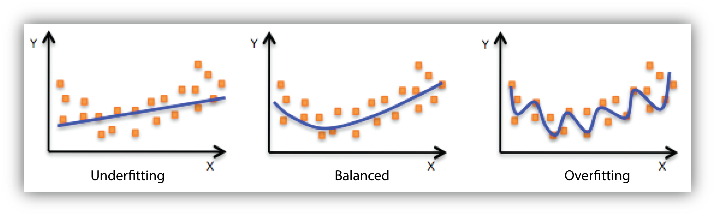

In [39]:
# to avoid overfit and underfit we use :
# ridge regression and lasso regression 

In [40]:
# interviewer might ask 
# bias vs variance trade off (intersection of variance and bias is taken as the final error)

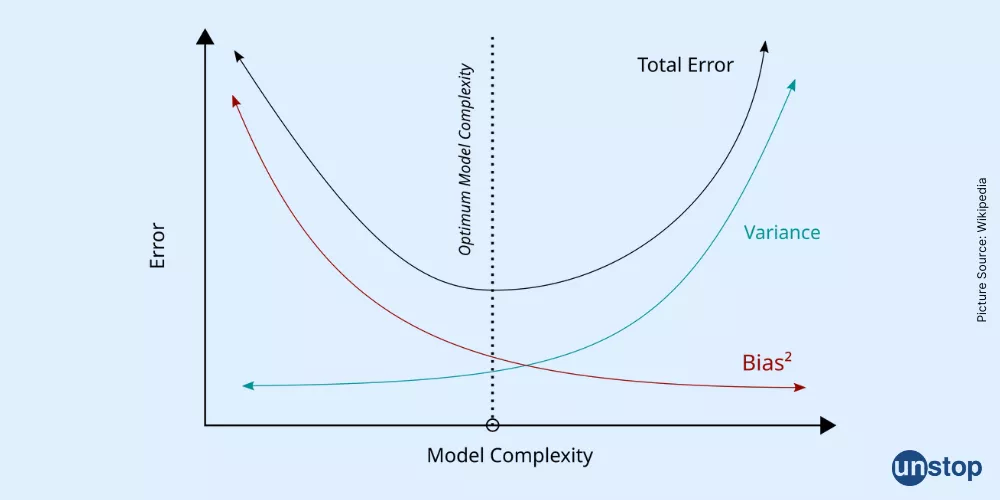

In [41]:
# PCA: Principal Component Analysis : a dimensionality (many features) reduction technique : only including important features
# PCA: Imp Features : (8 : 5)

#### 6.1.3 Checking VIF and Drop Column if VIF > 10

In [42]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2532,0.170694,0.392157,0.035235,0.019061,0.018751,0.002643,0.375133,0.533865


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF on the basis on X
X_train_df['intercept'] = 1
X_train_df.sample()

# intercept will find : correlation between features itself

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
2687,0.143108,0.764706,0.024694,0.019962,0.03823,0.001909,0.163656,0.619522,1


In [44]:
# X is an independent feature

In [45]:
# print(['Hello'+ str(i) for i in range(10)]) # known as list comprehension 

In [46]:
# X_train_df.shape[1]

In [47]:
# X_train_df.columns 

In [48]:
vif_df = pd.DataFrame()
vif_df['features'] = list(data_dict['feature_names'] + ['intercept'])
                          
vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range(X_train_df.shape[1])]
                          
vif_df['VIF factor'] = vif_value
vif_df.sort_values(by = 'VIF factor', ascending = False)

,features,VIF factor
8,intercept,177.876568
6,Latitude,9.316394
7,Longitude,8.977028
2,AveRooms,8.752272
3,AveBedrms,7.460090
0,MedInc,2.459841
1,HouseAge,1.240290
4,Population,1.136960
5,AveOccup,1.009297


In [49]:
# Because latitude and longitude has high corr and vif is close enough to 10 we can drop one or both the columns 

In [50]:
col = list(X.columns) 
col.remove('Latitude')
# print(col) 

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
12758,0.274631,0.72549,0.02811,0.020029,0.031587,0.002165,0.605578


In [51]:
print(col) 

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']


In [52]:
from sklearn.linear_model import Lasso, Ridge

In [53]:
# judge on the basis of lasso, ridge, score, error score 

In [54]:
 def build_model(ml_model, col):
    new_X_train = pd.DataFrame(X_train, columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test, columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)
    model_train_score = machine_model.score(final_X_train, y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = root_mean_squared_error(y_test,model_y_pred)
    model_r2_score = r2_score(y_test,model_y_pred) # how better has the model understood the data

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE error': model_mae_error,
                    'MSE error': model_mse_error,
                    'RMSE error': model_rmse_error,
                    'R2 Score': model_r2_score}
    
    model_metrics = pd.DataFrame(model_metrics, index = [1])

    return model_metrics,machine_model

In [55]:
ml_model = LinearRegression

build_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE error,MSE error,RMSE error,R2 Score
1,0.543073,0.531162,0.570342,0.621327,0.788243,0.531162


In [56]:
ml_model = Lasso

build_model(ml_model, col)[0]

,Model Training Score,Model Test Score,MAE error,MSE error,RMSE error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [57]:
ml_model = Ridge
build_model(ml_model, col)[0]

,Model Training Score,Model Test Score,MAE error,MSE error,RMSE error,R2 Score
1,0.52581,0.513927,0.59007,0.644168,0.802601,0.513927


In [58]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [59]:
all_model = [LinearRegression,Ridge]

from sklearn.preprocessing import StandardScaler #standarisation 
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
    X_train,X_test,y_train,y_test = train_test_split(ss_X,y, random_state=i, test_size=0.1)
    i += 1

    temp_df,final_model = build_model(Ridge,col)
    score = temp_df['Model Test Score'].values[0]

    print('Score is:',score)
    if score >= .6:
        print('Best Random State',i)
        display(temp_df)
        break
    display(clear = True)
    

Score is: 0.6067450510265389
Best Random State 178


,Model Training Score,Model Test Score,MAE error,MSE error,RMSE error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


In [60]:
final_model 

Ridge()

# 7. Model Save and Extra Objects 

In [61]:
import pickle 
with open('House_price_pred_model_ridge.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and scaller Saved Successfully')

ML model and scaller Saved Successfully


# 8. Website Building and LocalHost Deployment 

In [62]:
#ML Model : Client :
# Website : Input Value : Prediction 
# Website : Python Based : Django, Flask, Fastapi , : Streamlit
# Streamlit : Python Web-based, Framework, Fast ML model test website

In [64]:
# pip install streamlit

In [66]:
import streamlit as st
print('done')

done


In [67]:
# st.title('California Housing Price Prediction')

In [71]:
# ! : represents run this code in terminal

In [72]:
os.getcwd()

'C:\\Users\\Anjali'

In [73]:
col 

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [76]:
df.to_csv('california.csv')
print('done')

done


In [77]:
for i in df[col]:
    min_value,max_value = df[i].agg(['min','max'])
    # print(f'{i}_min', min_value, f'{i}_max',max_value)
    print('min',i,min_value)
    print('max',i,max_value)

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [78]:
# temp_df = pd.read_csv('california.csv')

# for i in df[col]:
#     min_value,max_value = df[i].agg(['min','max'])

# 9. Live Deployment using streamlit

In [79]:
# import streamlit as st
# import pandas as pd
# import random 
# from sklearn.preprocessing import StandardScaler
# import pickle
# import time

In [80]:
# github : housing price project 
# requirements.txt = we will write those modules which is important for app.py to run/project 

In [81]:
pd.__version__

'2.2.3'

In [82]:
st.__version__

'1.45.1'

In [85]:
import sklearn
sklearn.__version__

'1.6.1'